In [121]:
# initial imports
import pandas as pd
from pathlib import Path

# needed for model
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [109]:
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [110]:
teamstats_df.head(16)

,TEAM,MATCHUP,GAMEDATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,ATL,ATL vs. IND,4/18/2021,W,48,129,45,92,48.9,13,...,76.5,14,37,51,20,10,8,7,19,12
1,CHA,CHA vs. POR,4/18/2021,W,48,109,39,83,47.0,18,...,76.5,7,39,46,26,14,6,8,25,8
2,NOP,NOP @ NYK,4/18/2021,L,53,112,41,101,40.6,6,...,80.0,20,32,52,25,13,6,4,16,-10
3,MIA,MIA vs. BKN,4/18/2021,W,48,109,38,87,43.7,16,...,81.0,16,37,53,28,17,9,1,13,2
4,POR,POR @ CHA,4/18/2021,L,48,101,36,91,39.6,10,...,67.9,13,34,47,18,9,7,3,17,-8
5,OKC,OKC @ TOR,4/18/2021,L,48,106,37,82,45.1,14,...,85.7,9,37,46,22,23,6,8,19,-6
6,MIN,MIN @ LAC,4/18/2021,L,48,105,36,88,40.9,17,...,76.2,6,31,37,27,11,6,7,21,-19
7,ORL,ORL vs. HOU,4/18/2021,L,48,110,41,91,45.1,11,...,89.5,9,27,36,28,15,10,5,19,-4
8,TOR,TOR vs. OKC,4/18/2021,W,48,112,37,96,38.5,17,...,87.5,16,31,47,23,15,9,5,15,6
9,IND,IND @ ATL,4/18/2021,L,48,117,45,92,48.9,10,...,85.0,8,33,41,33,12,7,5,27,-12


In [111]:
teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE'])

In [112]:
teamstats_df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W/L     1700 non-null   object 
 1   MIN     1700 non-null   int64  
 2   PTS     1700 non-null   int64  
 3   FGM     1700 non-null   int64  
 4   FGA     1700 non-null   int64  
 5   FG%     1700 non-null   float64
 6   3PM     1700 non-null   int64  
 7   3PA     1700 non-null   int64  
 8   3P%     1700 non-null   float64
 9   FTM     1700 non-null   int64  
 10  FTA     1700 non-null   int64  
 11  FT%     1700 non-null   float64
 12  OREB    1700 non-null   int64  
 13  DREB    1700 non-null   int64  
 14  REB     1700 non-null   int64  
 15  AST     1700 non-null   int64  
 16  TOV     1700 non-null   int64  
 17  STL     1700 non-null   int64  
 18  BLK     1700 non-null   int64  
 19  PF      1700 non-null   int64  
 20  +/-     1700 non-null   int64  
dtypes: float64(3), int64(17), object(1)
m

In [113]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(20)

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,48,129,45,92,48.9,13,32,40.6,26,34,76.5,14,37,51,20,10,8,7,19,12
1,48,109,39,83,47.0,18,43,41.9,13,17,76.5,7,39,46,26,14,6,8,25,8
2,53,112,41,101,40.6,6,27,22.2,24,30,80.0,20,32,52,25,13,6,4,16,-10
3,48,109,38,87,43.7,16,39,41.0,17,21,81.0,16,37,53,28,17,9,1,13,2
4,48,101,36,91,39.6,10,36,27.8,19,28,67.9,13,34,47,18,9,7,3,17,-8
5,48,106,37,82,45.1,14,33,42.4,18,21,85.7,9,37,46,22,23,6,8,19,-6
6,48,105,36,88,40.9,17,45,37.8,16,21,76.2,6,31,37,27,11,6,7,21,-19
7,48,110,41,91,45.1,11,32,34.4,17,19,89.5,9,27,36,28,15,10,5,19,-4
8,48,112,37,96,38.5,17,38,44.7,21,24,87.5,16,31,47,23,15,9,5,15,6
9,48,117,45,92,48.9,10,32,31.3,17,20,85.0,8,33,41,33,12,7,5,27,-12


In [163]:
# defining target vector
y=teamstats_df['W/L'].values.reshape(-1,1)

In [164]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:10]

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: W/L, dtype: int64

In [165]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [166]:
X_train.shape


(1275, 20)

In [167]:
X_test.shape

(425, 20)

In [168]:
y_train.shape

(1275,)

In [169]:
y_test.shape

(425,)

In [170]:
# creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [171]:
# fitting the model
model = model.fit(X_train, y_train)

In [172]:
# predictions using the testing data
predictions = model.predict(X_test)

In [173]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

acc_score = accuracy_score(y_test, predictions)

In [174]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,209,0
Actual 1,0,216


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       216

    accuracy                           1.00       425
   macro avg       1.00      1.00      1.00       425
weighted avg       1.00      1.00      1.00       425



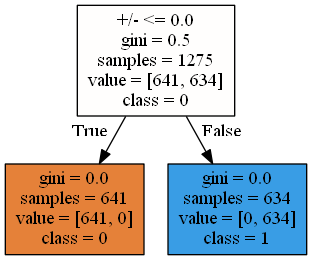

In [149]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())